# Logistic Regression

# on one value

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

# load dataset

In [2]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()

In [4]:
data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
petal_width=data['data'][:,3] #data for train

In [9]:
target_flower=data['target'] # target data

In [10]:
petal_width #petal_width
#convert in 2D before fitting to Regression

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [11]:
# either flower is virginica 
target_flower=(data['target']==2).astype(np.int)

In [12]:
target_flower

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Train machine using Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logistic=LogisticRegression(random_state=0)

In [15]:
# fitting to model
logistic=logistic.fit(petal_width.reshape(len(petal_width),1),target_flower)

C:\Users\premp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
# prediction of the data on behalf of the Regression
predict=logistic.predict(petal_width.reshape(len(petal_width),1))

In [17]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
# printing the data
predict=logistic.predict([[0.6]])
if predict==1:
    print("virginica")
else:
    print("Not virginica")
    

Not virginica


In [19]:
# [p-1,p]
probability=logistic.predict_proba(petal_width.reshape(len(petal_width),1)) 

In [20]:
probability

array([[0.97583795, 0.02416205],
       [0.97583795, 0.02416205],
       [0.97583795, 0.02416205],
       [0.97583795, 0.02416205],
       [0.97583795, 0.02416205],
       [0.95988006, 0.04011994],
       [0.96883275, 0.03116725],
       [0.97583795, 0.02416205],
       [0.97583795, 0.02416205],
       [0.98129904, 0.01870096],
       [0.97583795, 0.02416205],
       [0.97583795, 0.02416205],
       [0.98129904, 0.01870096],
       [0.98129904, 0.01870096],
       [0.97583795, 0.02416205],
       [0.95988006, 0.04011994],
       [0.95988006, 0.04011994],
       [0.96883275, 0.03116725],
       [0.96883275, 0.03116725],
       [0.96883275, 0.03116725],
       [0.97583795, 0.02416205],
       [0.95988006, 0.04011994],
       [0.97583795, 0.02416205],
       [0.94849246, 0.05150754],
       [0.97583795, 0.02416205],
       [0.97583795, 0.02416205],
       [0.95988006, 0.04011994],
       [0.97583795, 0.02416205],
       [0.97583795, 0.02416205],
       [0.97583795, 0.02416205],
       [0.

# plot Graph

In [21]:
# dividing to get sharp curve
x=np.linspace(0,3,3000).reshape(-1,1)

In [22]:
predict=logistic.predict_proba(x)[:,1]

In [23]:
predict

array([0.01445589, 0.01449325, 0.0145307 , ..., 0.97407672, 0.97414276,
       0.97420864])

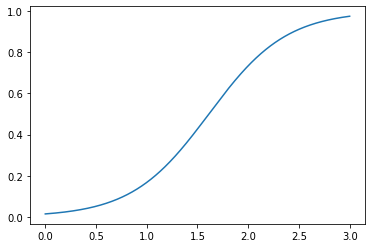

In [24]:
plt.plot(x,predict)

In [25]:
# probabilty of the result
predict=logistic.predict([[6]]) 
if predict==1:
    print("virginica")
else:
    print("Not virginica")

virginica


# on Complete data

In [26]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [27]:
trian_data=data['data']

In [28]:
target_data=data['target']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(trian_data,target_data,test_size=0.3,random_state=1)

In [31]:
logistic=LogisticRegression(random_state=0)

In [32]:
logistic=logistic.fit(x_train,y_train)

C:\Users\premp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\premp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [33]:
y_predict=logistic.predict(x_test)

In [34]:
for i in range(len(x_test)):
    print("[",y_test[i],"",y_predict[i],"]",end="")

[ 0  0 ][ 1  1 ][ 1  1 ][ 0  0 ][ 2  2 ][ 1  2 ][ 2  2 ][ 0  0 ][ 0  0 ][ 2  2 ][ 1  1 ][ 0  0 ][ 2  2 ][ 1  1 ][ 1  2 ][ 0  0 ][ 1  1 ][ 1  2 ][ 0  0 ][ 0  0 ][ 1  1 ][ 1  2 ][ 1  2 ][ 0  0 ][ 2  2 ][ 1  1 ][ 0  0 ][ 0  0 ][ 1  1 ][ 2  2 ][ 1  1 ][ 2  2 ][ 1  1 ][ 2  2 ][ 2  2 ][ 0  0 ][ 1  1 ][ 0  0 ][ 1  1 ][ 2  2 ][ 2  2 ][ 0  0 ][ 2  2 ][ 2  2 ][ 1  1 ]

In [35]:
#get actual and predict data
actual=[data.target_names[p] for p in y_test]
predict=[data.target_names[p] for p in y_predict]

In [36]:
for i in range(len(actual)):
    print(actual[i],"->",predict[i])

setosa -> setosa
versicolor -> versicolor
versicolor -> versicolor
setosa -> setosa
virginica -> virginica
versicolor -> virginica
virginica -> virginica
setosa -> setosa
setosa -> setosa
virginica -> virginica
versicolor -> versicolor
setosa -> setosa
virginica -> virginica
versicolor -> versicolor
versicolor -> virginica
setosa -> setosa
versicolor -> versicolor
versicolor -> virginica
setosa -> setosa
setosa -> setosa
versicolor -> versicolor
versicolor -> virginica
versicolor -> virginica
setosa -> setosa
virginica -> virginica
versicolor -> versicolor
setosa -> setosa
setosa -> setosa
versicolor -> versicolor
virginica -> virginica
versicolor -> versicolor
virginica -> virginica
versicolor -> versicolor
virginica -> virginica
virginica -> virginica
setosa -> setosa
versicolor -> versicolor
setosa -> setosa
versicolor -> versicolor
virginica -> virginica
virginica -> virginica
setosa -> setosa
virginica -> virginica
virginica -> virginica
versicolor -> versicolor


In [37]:
from sklearn import metrics
print("accuracy :",metrics.accuracy_score(y_test,y_predict))

accuracy : 0.8888888888888888


# Accuracy checking manually

In [38]:
count=0
for i in range(len(actual)):
    if(actual[i]==predict[i]):
        count=count+1

In [39]:
count,len(actual)

(40, 45)

In [40]:
40/45

0.8888888888888888

# lets predict

In [41]:
data['data'][0]

array([5.1, 3.5, 1.4, 0.2])

In [42]:
#actual-> seteso
y_predict=logistic.predict([data['data'][0]])

In [43]:
data.target_names[y_predict]

array(['setosa'], dtype='<U10')

In [44]:
x=np.random.permutation(20)

In [45]:
x

array([ 2, 16,  8, 12, 14, 15,  0,  6, 19,  3, 17,  1, 10,  5,  4, 11,  9,
       18, 13,  7])